<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

data = pd.read_excel('assinatura.xlsx')
data.columns

Index(['idade', 'fatura', 'temp_cli', 'linhas', 'renda', 'temp_rsd',
       'internet', 'premiere', 'cancel'],
      dtype='object')

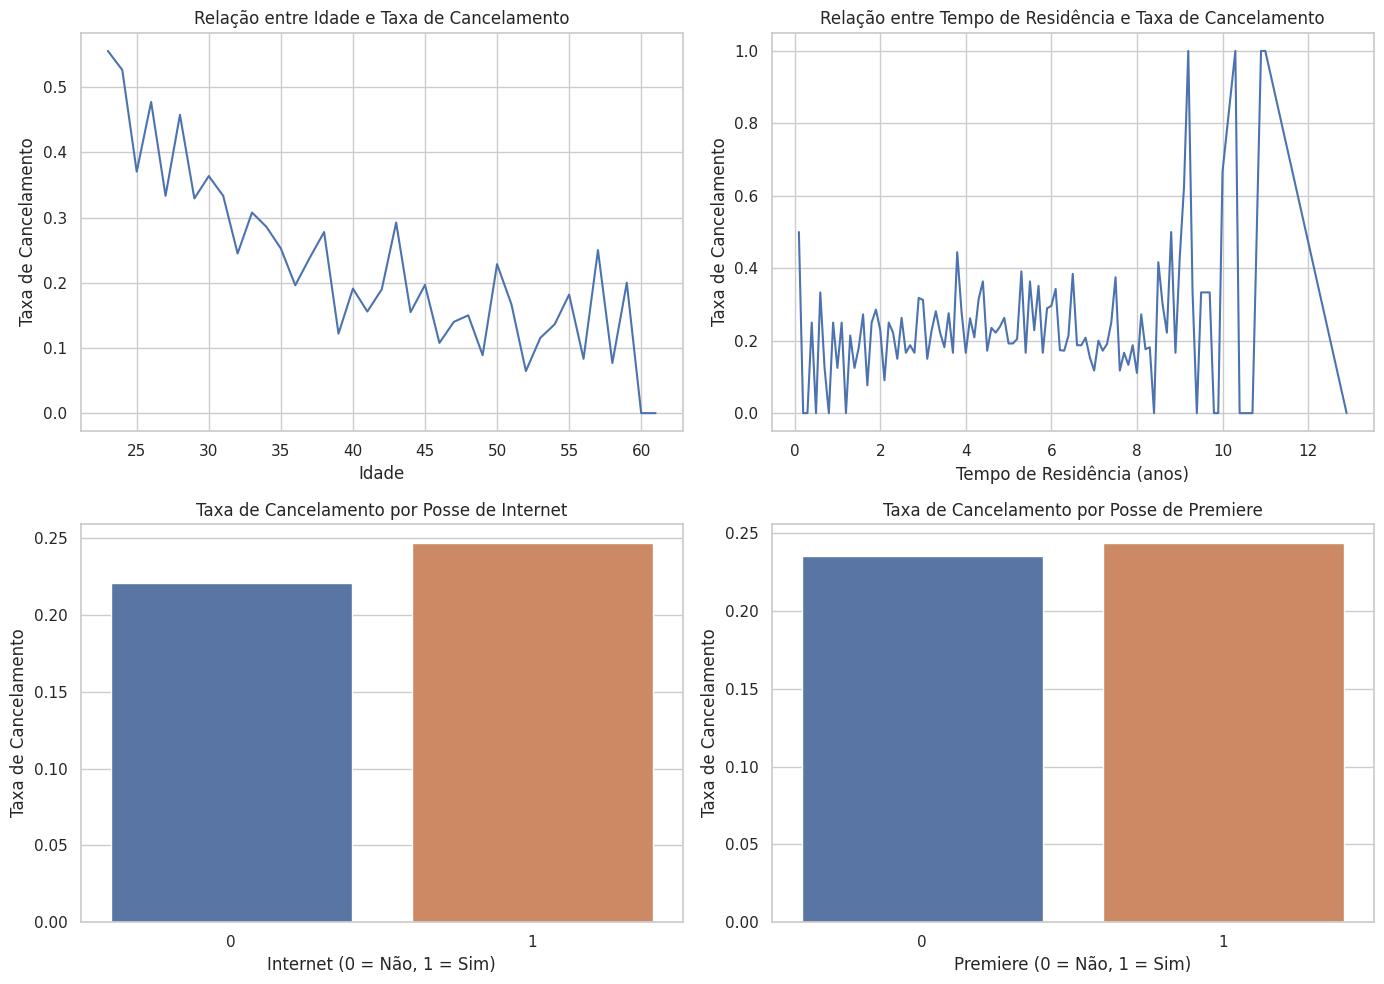

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações de estilo do Seaborn
sns.set(style="whitegrid")

# Preparando os dados para as análises
# 1. Relação entre idade e cancelamento
idade_cancel = data.groupby('idade')['cancel'].mean().reset_index()

# 2. Relação entre tempo de residência e cancelamento
temp_rsd_cancel = data.groupby('temp_rsd')['cancel'].mean().reset_index()

# 3. Relação entre posse de serviços adicionais (internet, premiere) e cancelamento
internet_cancel = data.groupby('internet')['cancel'].mean().reset_index()
premiere_cancel = data.groupby('premiere')['cancel'].mean().reset_index()

# Criando os gráficos
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico para idade vs. cancelamento
sns.lineplot(x='idade', y='cancel', data=idade_cancel, ax=axs[0, 0])
axs[0, 0].set_title('Relação entre Idade e Taxa de Cancelamento')
axs[0, 0].set_ylabel('Taxa de Cancelamento')
axs[0, 0].set_xlabel('Idade')

# Gráfico para tempo de residência vs. cancelamento
sns.lineplot(x='temp_rsd', y='cancel', data=temp_rsd_cancel, ax=axs[0, 1])
axs[0, 1].set_title('Relação entre Tempo de Residência e Taxa de Cancelamento')
axs[0, 1].set_ylabel('Taxa de Cancelamento')
axs[0, 1].set_xlabel('Tempo de Residência (anos)')

# Gráfico para internet vs. cancelamento
sns.barplot(x='internet', y='cancel', data=internet_cancel, ax=axs[1, 0])
axs[1, 0].set_title('Taxa de Cancelamento por Posse de Internet')
axs[1, 0].set_ylabel('Taxa de Cancelamento')
axs[1, 0].set_xlabel('Internet (0 = Não, 1 = Sim)')

# Gráfico para premiere vs. cancelamento
sns.barplot(x='premiere', y='cancel', data=premiere_cancel, ax=axs[1, 1])
axs[1, 1].set_title('Taxa de Cancelamento por Posse de Premiere')
axs[1, 1].set_ylabel('Taxa de Cancelamento')
axs[1, 1].set_xlabel('Premiere (0 = Não, 1 = Sim)')

plt.tight_layout()
plt.show()


Chat GPT: Ajustar uma DecisionTree no pacote sklearn no banco de dados data. Usar amostra treino e teste. Plote a árvore de decisão (splits =2 e max_depth = 4) para todos os dados (treino + teste). Mostra a acurácia fora da amostra (teste)

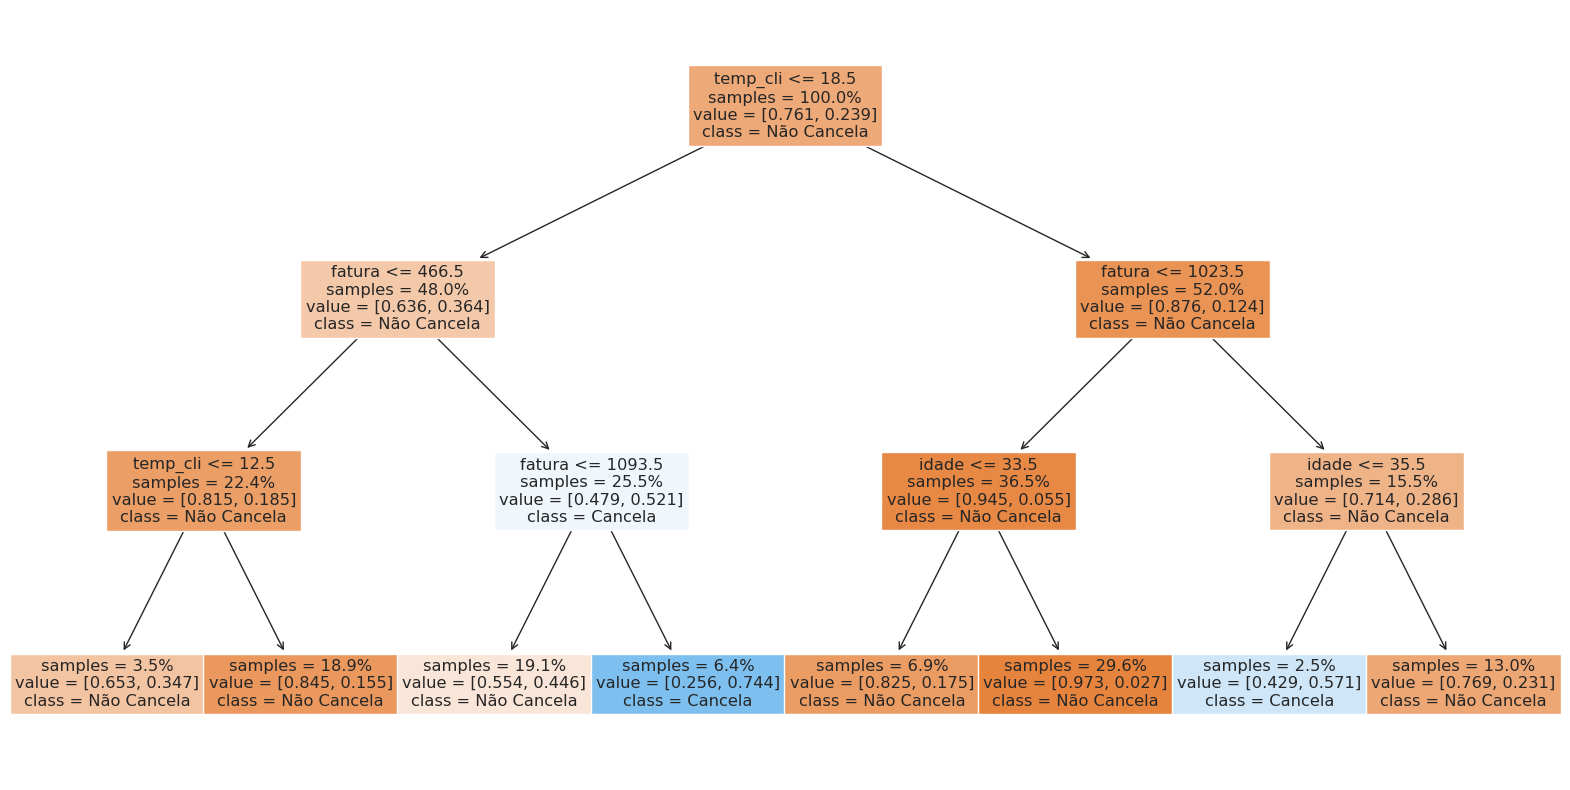

0.785

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

# Separando as variáveis independentes (X) e a variável dependente (y)
X = data.drop('cancel', axis=1)
y = data['cancel']

# Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ajustando uma Decision Tree
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)

# Previsões e cálculo da acurácia
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Ajustando novamente a Decision Tree com o parâmetro para fornecer probabilidades
dt_classifier_prob = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier_prob.fit(X_train, y_train)

# Plotando a árvore de decisão com probabilidades
plt.figure(figsize=(20,10))
plot_tree(dt_classifier_prob, filled=True, feature_names=X.columns, class_names=['Não Cancela', 'Cancela'], max_depth=4, proportion=True, impurity=False)
plt.show()

accuracy


Chat GPT: Um cliente tem fatura de 600, idade de 35 e temp_cli de 10 Qual é a classificação deste cliente (cancela ou não cancela) Gere o código em python

In [14]:
# Criando um novo DataFrame com as informações do cliente
cliente_data = pd.DataFrame({
    'idade': [35],
    'fatura': [600],
    'temp_cli': [40],
    # Preenchendo os outros atributos com valores médios ou mais comuns
    # já que eles não foram especificados
    'linhas': [data['linhas'].mean()],
    'renda': [data['renda'].mean()],
    'temp_rsd': [data['temp_rsd'].mean()],
    'internet': [data['internet'].mode()[0]],
    'premiere': [data['premiere'].mode()[0]]
})

# Fazendo a previsão para este cliente específico
cliente_pred = dt_classifier.predict(cliente_data)

# Traduzindo a previsão para um formato mais legível
classificacao = "Cancela" if cliente_pred[0] == 1 else "Não Cancela"
classificacao


'Não Cancela'

ChatGPT: Calcule pela matriz de confusão e a taxa de falsos positivos e negativos.



In [15]:
from sklearn.metrics import confusion_matrix

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Extraindo os valores da matriz de confusão
tn, fp, fn, tp = conf_matrix.ravel()

# Calculando as taxas de falsos positivos e negativos
fpr = fp / (fp + tn)  # False Positive Rate
fnr = fn / (fn + tp)  # False Negative Rate

fpr, fnr



(0.037199124726477024, 0.7832167832167832)